In [2]:
import numpy as np

chi_squared_values = []

N = 32561
expected = N / 2

for i in range(1000):
    
    r = np.random.random(N,)
    r[r < .5] = 0
    r[r > 0] = 1
    
    female_count = np.count_nonzero(r)
    male_count = N - female_count
    
    female_diff = (female_count - expected)**2 / expected
    male_diff = (male_count - expected)**2 / expected
    
    chi_sq = female_diff + male_diff

    chi_squared_values.append(chi_sq)


In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

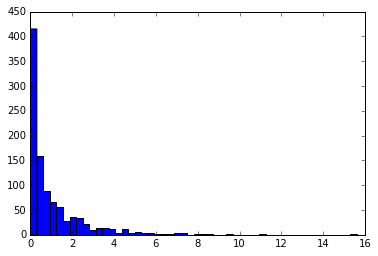

In [8]:
plt.hist(chi_squared_values, bins=50)
plt.show()

(array([ 766.,  162.,   39.,   18.,    8.,    4.,    1.,    1.,    0.,    1.]),
 array([  0.        ,   1.54133333,   3.08266667,   4.624     ,
          6.16533333,   7.70666667,   9.248     ,  10.78933333,
         12.33066667,  13.872     ,  15.41333333]),
 <a list of 10 Patch objects>)

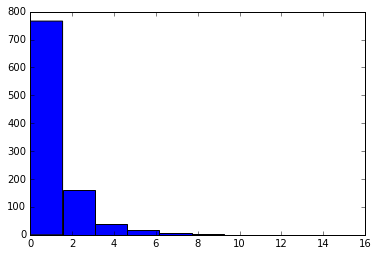

In [9]:
chi_squared_values = []
import numpy as np
import matplotlib.pyplot as plt

for i in range(1000):
    
    sample = np.random.random((300,))
    
    sample[sample < .5] = 0
    sample[sample >= .5] = 1
    
    male_count = len(sample[sample == 0])
    female_count = len(sample[sample == 1])
    
    male_diff = (male_count - 150)**2 / 150
    female_diff = (female_count - 150)**2 / 150
    
    chi_sq = male_diff + female_diff
    
    chi_squared_values.append(chi_sq)
    
plt.hist(chi_squared_values)

In [15]:
labels = ['White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo', 'Other']
observed = [27816, 3124, 1039, 311, 271]
expected = [26146.5, 3939.9, 944.3, 260.5, 1269.8]

race_chisqs = []

for idx, i in enumerate(labels):
    chisq = (expected[idx] - observed[idx]) ** 2 / expected[idx]
    print("chisq of {} is {}".format(i, chisq))
    race_chisqs.append(chisq)

race_chisq = sum(race_chisqs)
print("race chisq is {}".format(race_chisq))

chisq of White is 106.60051058459067
chisq of Black is 168.96185436178587
chisq of Asian-Pac-Islander is 9.49707720004237
chisq of Amer-Indian-Eskimo is 9.789827255278311
chisq of Other is 785.6366671916837
race chisq is 1080.485936593381


In [18]:
from scipy.stats import chisquare
import numpy as np

observed = np.array([27816, 3124, 1039, 311, 271])
expected = np.array([26146.5, 3939.9, 944.3, 260.5, 1269.8])

chisquare_value, pvalue = chisquare(observed, expected)
chisquare_value, pvalue

(1080.485936593381, 1.2848494674873035e-232)

# Two Dimensions

In [62]:
import pandas as pd

# make the dataset of observed values

df = pd.DataFrame({"Male": [6662, 15128], "Female": [1179, 9592]}, 
                  index=[">50k", "<=50k"],
                  columns=["Male", "Female"])
df

,Male,Female
>50k,6662,1179
<=50k,15128,9592


In [63]:
# add totals column
df["Totals"] = df["Female"] + df["Male"]
df

,Male,Female,Totals
>50k,6662,1179,7841
<=50k,15128,9592,24720


In [64]:
# add totals row
df = df.append(pd.Series(df.sum(), name="Totals"))
df

,Male,Female,Totals
>50k,6662,1179,7841
<=50k,15128,9592,24720
Totals,21790,10771,32561


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, >50k to Totals
Data columns (total 3 columns):
Male      3 non-null int64
Female    3 non-null int64
Totals    3 non-null int64
dtypes: int64(3)
memory usage: 96.0+ bytes


In [123]:
# calculate proportions

# total number of observations
N = df["Totals"].iloc[2].round(1)
print(N)

props_male = (df["Male"] / N).round(3)
props_female = (df["Female"] / N).round(3)
props_totals= (df["Totals"] / N).round(3)

print(props_male)
print(props_female)
print(props_totals)

32561
>50k      0.205
<=50k     0.465
Totals    0.669
Name: Male, dtype: float64
>50k      0.036
<=50k     0.295
Totals    0.331
Name: Female, dtype: float64
>50k      0.241
<=50k     0.759
Totals    1.000
Name: Totals, dtype: float64


In [118]:
df_props = pd.DataFrame({"Male": props_male, "Female": props_female, "Totals": props_totals},
                        index=[">50k", "<=50k", "Totals"],
                        columns=["Male", "Female", "Totals"])
df_props

,Male,Female,Totals
>50k,0.205,0.036,0.241
<=50k,0.465,0.295,0.759
Totals,0.669,0.331,1.000


In [127]:
# chi squared expected values
males_over50k = round(.669 * .241 * 32561, 1)
females_over50k = round(.331 * .241 * 32561, 1)
males_under50k = round(.669 * .759 * 32561, 1)
females_under50k = round(.331 * .759 * 32561, 1)

expected = [males_over50k, females_over50k, males_under50k, females_under50k]
print(expected)

[5249.8, 2597.4, 16533.5, 8180.3]


In [128]:
# chi squared expected values using the df

males_over50k = round(df_props["Male"].loc["Totals"] * df_props["Totals"].loc[">50k"] * N, 1)
females_over50k = round(df_props["Female"].loc["Totals"] * df_props["Totals"].loc[">50k"] * N, 1)
males_under50k = round(df_props["Male"].loc["Totals"] * df_props["Totals"].loc["<=50k"] * N, 1)
females_under50k = round(df_props["Female"].loc["Totals"] * df_props["Totals"].loc["<=50k"] * N, 1)

expected = [males_over50k, females_over50k, males_under50k, females_under50k]
print(expected)

[5249.8000000000002, 2597.4000000000001, 16533.5, 8180.3000000000002]


In [129]:
observed = df.loc[[">50k", "<=50k"]][["Male", "Female"]].values.flatten()
observed

array([ 6662,  1179, 15128,  9592])

In [133]:
import numpy as np
from scipy.stats import chisquare

observed = np.array([6662, 1179, 15128, 9592])
expected = np.array([5249.8, 2597.4, 16533.5, 8180.3])
chisquare_value_gender_income, pvalue_gender_income = chisquare(observed, expected)
print(chisquare_value_gender_income, pvalue_gender_income)

1517.55109815 0.0


In [134]:
import numpy as np
from scipy.stats import chisquare

observed = df.loc[[">50k", "<=50k"]][["Male", "Female"]].values.flatten()
expected = np.array([males_over50k, females_over50k, males_under50k, females_under50k])
chisquare_value_gender_income, pvalue_gender_income = chisquare(observed, expected)
print(chisquare_value_gender_income, pvalue_gender_income)

1517.55109815 0.0


In [140]:
table = pd.crosstab(df["Male"], df["Female"])
print(table)

Female  1179   9592   10771
Male                       
6662        1      0      0
15128       0      1      0
21790       0      0      1
